In [1]:
import alpaca_trade_api as alpaca
from dotenv import load_dotenv
import os
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import datetime as dt
import statistics
from sklearn.linear_model import LinearRegression

In [2]:
# initialize API from API keys in .env
load_dotenv()
api_key = os.environ['APCA-API-KEY-ID']
api_secret_key = os.environ['APCA-API-SECRET-KEY']
api_base_url = 'https://paper-api.alpaca.markets'
api = alpaca.REST(api_key, api_secret_key, api_base_url)

In [3]:
bars = api.get_bars("GOOGL", alpaca.TimeFrame.Day, '2020-01-01', adjustment='split').df
QQQ_bars = api.get_bars("QQQ", alpaca.TimeFrame.Day, '2020-01-01', adjustment='split').df
bars['change'] = bars['close'].diff()
QQQ_bars['change'] = QQQ_bars['close'].diff()
bars['percent change'] = bars['change'] / bars['close'] * 100
QQQ_bars['percent change'] = QQQ_bars['change'] / QQQ_bars['close'] * 100
bars = bars.dropna()
QQQ_bars = QQQ_bars.dropna()
display(bars.head(10))
display(bars.tail(10))
display(QQQ_bars.head(10))
display(QQQ_bars.tail(10))
print(len(bars))
print(len(QQQ_bars))

,close,high,low,trade_count,open,volume,vwap,change,percent change
timestamp,,,,,,,,,
2020-01-03 05:00:00+00:00,68.08,68.69,67.37,35786,67.40,26398800,68.16,-0.35,-0.514101
2020-01-06 05:00:00+00:00,69.89,69.92,67.55,53136,67.58,50054620,69.43,1.81,2.589784
2020-01-07 05:00:00+00:00,69.76,70.18,69.58,43800,70.02,36980380,69.91,-0.13,-0.186353
2020-01-08 05:00:00+00:00,70.25,70.59,69.63,46171,69.74,39401060,70.26,0.49,0.697509
2020-01-09 05:00:00+00:00,70.99,71.43,70.51,43632,71.10,37612260,71.00,0.74,1.042400
2020-01-10 05:00:00+00:00,71.45,71.75,70.98,39804,71.47,28768640,71.47,0.46,0.643807
2020-01-13 05:00:00+00:00,72.00,72.07,71.27,38656,71.76,34785920,71.83,0.55,0.763889
2020-01-14 05:00:00+00:00,71.53,72.13,71.39,38563,72.00,29421120,71.71,-0.47,-0.657067
2020-01-15 05:00:00+00:00,71.96,72.04,71.58,32701,71.65,24942540,71.86,0.43,0.597554


,close,high,low,trade_count,open,volume,vwap,change,percent change
timestamp,,,,,,,,,
2025-01-24 05:00:00+00:00,200.2100,200.900,198.00,293405,198.100,23877521,199.783483,2.2300,1.113830
2025-01-27 05:00:00+00:00,191.8100,196.880,190.73,617250,192.410,41728893,192.975724,-8.4000,-4.379334
2025-01-28 05:00:00+00:00,195.3000,195.480,190.68,332199,192.745,24157929,194.438981,3.4900,1.786994
2025-01-29 05:00:00+00:00,195.4100,196.785,193.43,276385,195.555,18218256,195.082918,0.1100,0.056292
2025-01-30 05:00:00+00:00,200.8700,201.400,197.67,336195,198.000,24354684,200.161218,5.4600,2.718176
2025-01-31 05:00:00+00:00,204.0200,205.480,201.80,411503,202.000,32041952,204.254060,3.1500,1.543966
2025-02-03 05:00:00+00:00,201.2300,203.750,200.10,404052,200.690,27815470,201.870186,-2.7900,-1.386473
2025-02-04 05:00:00+00:00,206.3800,207.050,202.81,613259,203.390,43757263,205.376059,5.1500,2.495397
2025-02-05 05:00:00+00:00,191.3300,192.750,188.03,1094134,191.070,70461770,190.219598,-15.0500,-7.865991


,close,high,low,trade_count,open,volume,vwap,change,percent change
timestamp,,,,,,,,,
2020-01-03 05:00:00+00:00,214.18,215.47,213.2800,129280,213.29,27845316,214.616328,-1.98,-0.924456
2020-01-06 05:00:00+00:00,215.56,215.59,212.2400,96333,212.49,22140049,214.440611,1.38,0.640193
2020-01-07 05:00:00+00:00,215.53,216.14,214.8500,91735,215.64,23496517,215.631806,-0.03,-0.013919
2020-01-08 05:00:00+00:00,217.15,218.14,215.1600,124194,215.47,26872014,216.866063,1.62,0.746028
2020-01-09 05:00:00+00:00,218.99,219.41,217.7125,110600,218.91,24006173,218.778176,1.84,0.840221
2020-01-10 05:00:00+00:00,218.43,219.87,218.0400,99305,219.76,22206287,219.119754,-0.56,-0.256375
2020-01-13 05:00:00+00:00,220.95,220.98,218.9800,92409,219.31,24137747,220.224429,2.52,1.140530
2020-01-14 05:00:00+00:00,220.08,221.21,219.7400,133071,220.75,24836522,220.407667,-0.87,-0.395311
2020-01-15 05:00:00+00:00,220.17,221.20,219.4500,109400,220.18,25915073,220.432277,0.09,0.040878


,close,high,low,trade_count,open,volume,vwap,change,percent change
timestamp,,,,,,,,,
2025-01-24 05:00:00+00:00,529.6300,533.7900,528.1500,245013,533.02,19878251,530.718158,-3.0100,-0.568321
2025-01-27 05:00:00+00:00,514.2100,517.9900,510.1500,711240,511.00,60771695,513.622641,-15.4200,-2.998775
2025-01-28 05:00:00+00:00,521.8100,523.0000,511.7800,351921,515.22,33194214,519.188530,7.6000,1.456469
2025-01-29 05:00:00+00:00,520.8300,522.5900,516.8988,324973,522.46,26649011,520.101341,-0.9800,-0.188161
2025-01-30 05:00:00+00:00,523.0500,526.0950,518.2100,303369,523.71,27431302,522.420853,2.2200,0.424434
2025-01-31 05:00:00+00:00,522.2900,531.5178,521.1900,416731,526.92,38845467,526.395082,-0.7600,-0.145513
2025-02-03 05:00:00+00:00,518.1100,520.8496,511.0500,529048,513.47,40455918,517.000437,-4.1800,-0.806778
2025-02-04 05:00:00+00:00,524.4700,525.1100,518.2300,278647,518.63,25828954,523.180845,6.3600,1.212653
2025-02-05 05:00:00+00:00,526.8500,527.0100,520.6200,270425,521.82,21134070,523.965132,2.3800,0.451741


1281
1281


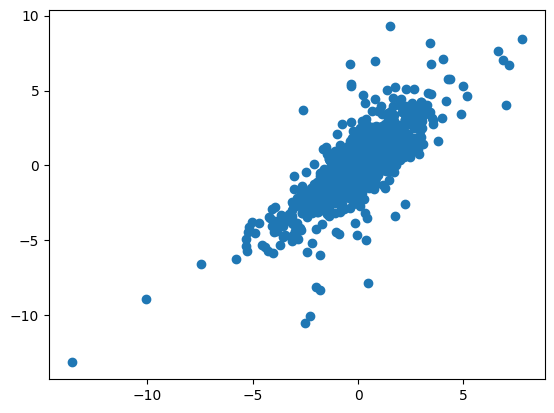

In [4]:
plt.scatter(QQQ_bars['percent change'], bars['percent change'])

In [5]:

# Assuming df1 and df2 are your dataframes and 'col1' and 'col2' are the columns
x = QQQ_bars['percent change'].values.reshape(-1, 1)  # Independent variable (reshape for 2D array)
y = bars['percent change'].values  # Dependent variable

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Optionally, you can get the R^2 value to evaluate the model
r_squared = model.score(x, y)
print(f"R-squared: {r_squared}")

Slope: 1.0096792487210327
Intercept: 0.0013895133715226132
R-squared: 0.6317511810461773


count    1281.000000
mean        0.058618
std         2.058689
min       -13.159366
25%        -0.960352
50%         0.166806
75%         1.135183
max         9.275952
Name: percent change, dtype: float64


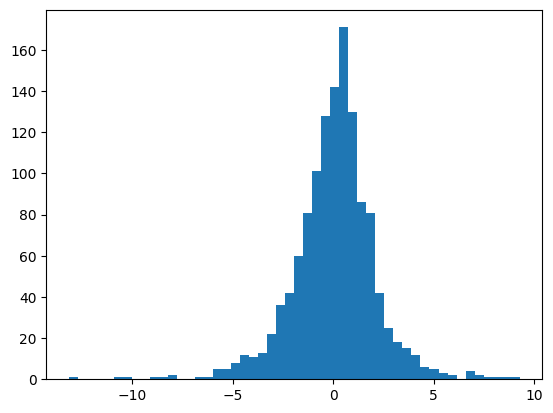

count    1281.000000
mean        0.056680
std         1.620617
min       -13.608978
25%        -0.707312
50%         0.128413
75%         0.949174
max         7.809088
Name: percent change, dtype: float64


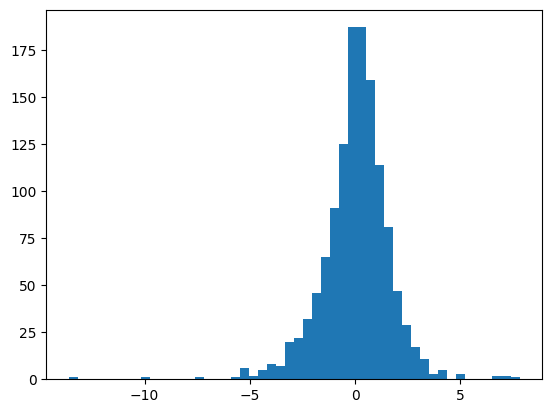

<Figure size 640x480 with 0 Axes>

In [6]:
print(bars['percent change'].describe())
plt.hist(bars['percent change'], bins=50)
plt.show()
plt.clf()
print(QQQ_bars['percent change'].describe())
plt.hist(QQQ_bars['percent change'], bins=50)
plt.show()
plt.clf()